In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [296]:
df=pd.read_csv(r'I:\Text Datasets\Analysed Data with Python\ICC ODI Batting 2589.csv',encoding='latin',na_values=['-','NaN','Null'])

In [297]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player_URL
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,200*,44.83,21367.0,86.23,49.0,96.0,20.0,http://stats.espncricinfo.com/ci/content/playe...
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169,41.98,18048.0,78.86,25.0,93.0,15.0,http://stats.espncricinfo.com/ci/content/playe...
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164,42.03,17046.0,80.39,30.0,82.0,20.0,http://stats.espncricinfo.com/ci/content/playe...
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189,32.36,14725.0,91.20,28.0,68.0,34.0,http://stats.espncricinfo.com/ci/content/playe...
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144,33.37,16020.0,78.96,19.0,77.0,28.0,http://stats.espncricinfo.com/ci/content/playe...


### Pre-Processing , Data Cleaning
 - Fixing Fields Name
 - Removing Unwanted Features
 - Seprating Data from Single Field to Multiple Fields
 - Removing Null Values
 - Converting Data Types
 - Calculating Field

In [298]:
#First of Fixing Filed Names 
df.rename(columns={'Mat':'Matches','Inns':'Innings','NO':'Player Number','HS':'High Score','Ave':'Average','SR':'Strike Rate','100':'Century','50':'Fifty','0':'Zero','BF':'Ball Faced'},inplace=True)

In [299]:
df.head()

,Player,Span,Matches,Innings,Player Number,Runs,High Score,Average,Ball Faced,Strike Rate,Century,Fifty,Zero,Player_URL
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,200*,44.83,21367.0,86.23,49.0,96.0,20.0,http://stats.espncricinfo.com/ci/content/playe...
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169,41.98,18048.0,78.86,25.0,93.0,15.0,http://stats.espncricinfo.com/ci/content/playe...
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164,42.03,17046.0,80.39,30.0,82.0,20.0,http://stats.espncricinfo.com/ci/content/playe...
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189,32.36,14725.0,91.20,28.0,68.0,34.0,http://stats.espncricinfo.com/ci/content/playe...
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144,33.37,16020.0,78.96,19.0,77.0,28.0,http://stats.espncricinfo.com/ci/content/playe...


In [300]:
#Remvoing Unwanted Feature
df=df.drop(['Player_URL','Ball Faced'],axis=1)

In [301]:
#Span is containng two dates as start & end with string data type we will seprate them & convert to date (datatype)
df[['Start Date','End Date']]=df.Span.str.split(pat='-',expand=True)

In [302]:
df.drop('Span',axis=1,inplace=True)

In [303]:
df.head()

,Player,Matches,Innings,Player Number,Runs,High Score,Average,Strike Rate,Century,Fifty,Zero,Start Date,End Date
0,SR Tendulkar (INDIA),463,452.0,41.0,18426.0,200*,44.83,86.23,49.0,96.0,20.0,1989,2012
1,KC Sangakkara (Asia/ICC/SL),404,380.0,41.0,14234.0,169,41.98,78.86,25.0,93.0,15.0,2000,2015
2,RT Ponting (AUS/ICC),375,365.0,39.0,13704.0,164,42.03,80.39,30.0,82.0,20.0,1995,2012
3,ST Jayasuriya (Asia/SL),445,433.0,18.0,13430.0,189,32.36,91.20,28.0,68.0,34.0,1989,2011
4,DPMD Jayawardene (Asia/SL),448,418.0,39.0,12650.0,144,33.37,78.96,19.0,77.0,28.0,1998,2015


In [304]:
#Checking Null Percentage 
df.isnull().sum()/df.shape[0]*100

Player           0.000000
Matches          0.000000
Innings          3.592121
Player Number    3.592121
Runs             3.592121
High Score       3.592121
Average          8.227115
Strike Rate      3.939745
Century          3.592121
Fifty            3.592121
Zero             3.592121
Start Date       0.000000
End Date         0.000000
dtype: float64

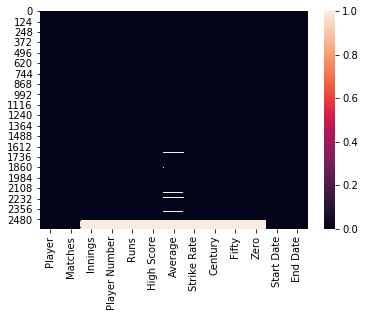

In [305]:
# visualizing null values 
sns.heatmap(df.isnull())

In [306]:
#i will drop all null values with single function because all are less than 5% except average but i also them
clear_empty_df=df.dropna()

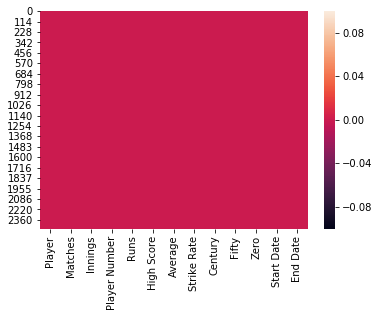

In [307]:
# visualizing after cleaning data
sns.heatmap(clear_empty_df.isnull())
#Shoiwng zero null values

In [308]:
#Calculating Null Values
clear_empty_df.isnull().sum()

Player           0
Matches          0
Innings          0
Player Number    0
Runs             0
High Score       0
Average          0
Strike Rate      0
Century          0
Fifty            0
Zero             0
Start Date       0
End Date         0
dtype: int64

In [309]:
#now check datatypes for calculation
clear_empty_df.dtypes
# But still String Type exist in High Score 

Player            object
Matches            int64
Innings          float64
Player Number    float64
Runs             float64
High Score        object
Average          float64
Strike Rate      float64
Century          float64
Fifty            float64
Zero             float64
Start Date        object
End Date          object
dtype: object

In [310]:
clear_empty_df['High Score'].unique()
# Showing some '*' whcih reprsents "not out" so need to seprate them

array(['200*', '169', '164', '189', '144', '183', '137*', '139', '153',
       '183*', '215', '161*', '141*', '172', '176', '153*', '145', '264',
       '194', '150', '152*', '132*', '173', '181*', '219', '159', '175',
       '124', '134*', '130', '120*', '143', '131*', '119*', '148', '102',
       '145*', '141', '174*', '108*', '154', '188*', '189*', '237*',
       '140*', '142*', '139*', '127*', '122', '166', '121', '133*',
       '113*', '185*', '178*', '116*', '112', '185', '109*', '119',
       '144*', '150*', '179', '96*', '156', '115', '178', '134', '117',
       '107*', '147*', '116', '126*', '137', '142', '158', '177', '123',
       '118', '128*', '103', '117*', '101', '104', '175*', '86', '129*',
       '102*', '125*', '111', '103*', '105', '109', '180', '107', '108',
       '72*', '110', '170', '112*', '79*', '93', '151', '111*', '121*',
       '135', '136', '83', '101*', '95', '160*', '130*', '161', '106',
       '171', '167*', '99', '89', '114', '131', '100', '138*', '87',

In [311]:
# defining function for cleaning HS & making new field
def cleaning_sep(series):
    final=[]
    for val in series:
        # Not Out
        if '*' in val:
            final.append(1)
        # Out
        else:
            final.append(0)
    return pd.Series(final,name='Final',dtype='int64'),series.str.replace('*','')
Final,HS=cleaning_sep(clear_empty_df['High Score'])

In [312]:
clear_empty_df['Final']=Final
clear_empty_df['HIGH SCORE']=HS

C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [313]:
#Checking new updates
clear_empty_df.head()
#Removing noised High Score Field which is irrelevent now
clear_empty_df.drop("High Score",inplace=True,axis=1)

In [314]:
# Finally Chekcing Data types & fixing them as date for Start & End Date & int64 for HIGH SCORE
clear_empty_df.dtypes

Player            object
Matches            int64
Innings          float64
Player Number    float64
Runs             float64
Average          float64
Strike Rate      float64
Century          float64
Fifty            float64
Zero             float64
Start Date        object
End Date          object
Final            float64
HIGH SCORE        object
dtype: object

In [315]:
# Changing Datatypes
clear_empty_df['HIGH SCORE']=clear_empty_df['HIGH SCORE'].astype('int64')
clear_empty_df['Start Date']=pd.to_datetime(clear_empty_df['Start Date'])
clear_empty_df['End Date']=pd.to_datetime(clear_empty_df['End Date'])

C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [316]:
# Player field also need cleaing for seprating country names
def seprating(series):
    player_names=[]
    country_names=[]
    sep=series.str.split('(')
    for pl in sep:
        player_names.append(pl[0].replace('\xa0',''))
    for cn in sep:
        country_names.append(cn[1].replace('ICC','').replace('Asia','').replace('Afr','').replace('/','').replace(')',''))
    return pd.Series(player_names,name='Player'),pd.Series(country_names,name='Country')
players,country=seprating(clear_empty_df.Player)
clear_empty_df['Player']=players
clear_empty_df['Country']=country

C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\H A M Z A\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [317]:
pure_df=clear_empty_df.copy()

In [318]:
# Career finding for each player
pure_df['Career']=pure_df['End Date'].dt.year-pure_df['Start Date'].dt.year

#### Our data is 100% clean for Descriptive Analysis 

In [319]:
pure_df.head()

,Player,Matches,Innings,Player Number,Runs,Average,Strike Rate,Century,Fifty,Zero,Start Date,End Date,Final,HIGH SCORE,Country,Career
0,SR Tendulkar,463,452.0,41.0,18426.0,44.83,86.23,49.0,96.0,20.0,1989-01-01,2012-01-01,1.0,200,INDIA,23
1,KC Sangakkara,404,380.0,41.0,14234.0,41.98,78.86,25.0,93.0,15.0,2000-01-01,2015-01-01,0.0,169,SL,15
2,RT Ponting,375,365.0,39.0,13704.0,42.03,80.39,30.0,82.0,20.0,1995-01-01,2012-01-01,0.0,164,AUS,17
3,ST Jayasuriya,445,433.0,18.0,13430.0,32.36,91.20,28.0,68.0,34.0,1989-01-01,2011-01-01,0.0,189,SL,22
4,DPMD Jayawardene,448,418.0,39.0,12650.0,33.37,78.96,19.0,77.0,28.0,1998-01-01,2015-01-01,0.0,144,SL,17


#### Top 10 Players of Country which has total Runs 

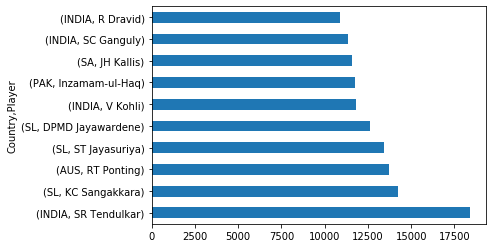

In [320]:
pure_df.groupby(['Country','Player']).Runs.max().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players which did more Centuries

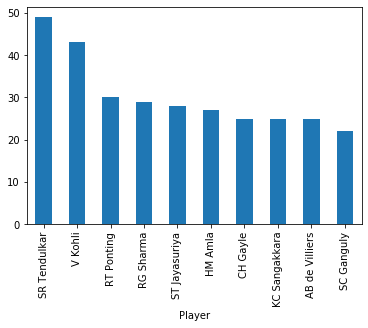

In [321]:
pure_df.groupby('Player')['Century'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar')

#### Top 10 Players which did more Fifties

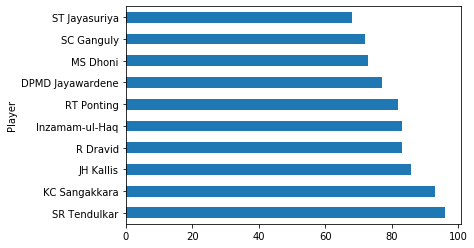

In [322]:
pure_df.groupby('Player')['Fifty'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players which give wicket on zero score

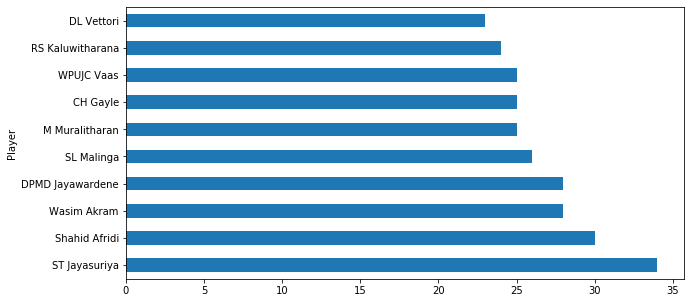

In [323]:
plt.figure(figsize=(10,5))
pure_df.groupby('Player')['Zero'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players Played of Long Careers

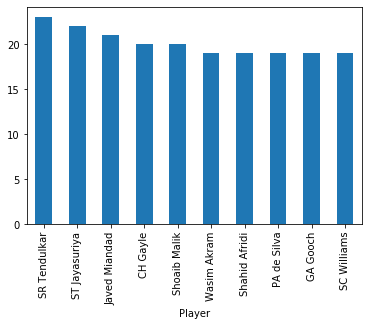

In [324]:
pure_df.groupby('Player')['Career'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar')

#### Top 10 Players which did Best Score in ODI Ranking

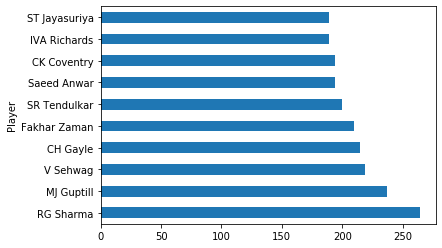

In [325]:
pure_df.groupby('Player')['HIGH SCORE'].max().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players of Country with High Strike

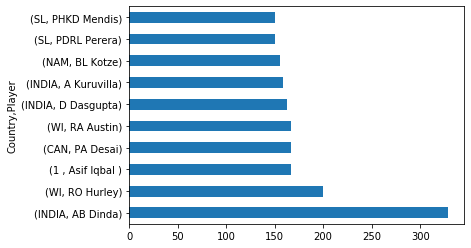

In [326]:
pure_df.groupby(['Country','Player'])['Strike Rate'].max().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players of Country which has long Career and  Best Averages

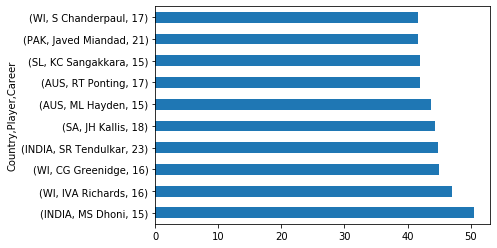

In [327]:
pure_df[pure_df.Career.values>=15].groupby(['Country','Player','Career'])['Average'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Players which Played more Mathces

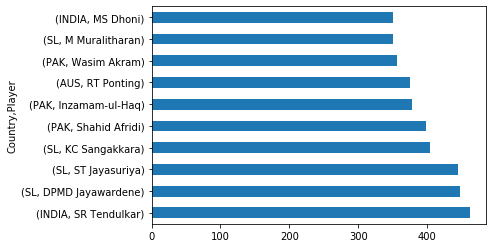

In [328]:
pure_df.groupby(['Country','Player'])['Matches'].max().sort_values(ascending=False).iloc[:10].plot(kind='barh')

#### Top 10 Countres for Highest Total Runs in ODI 

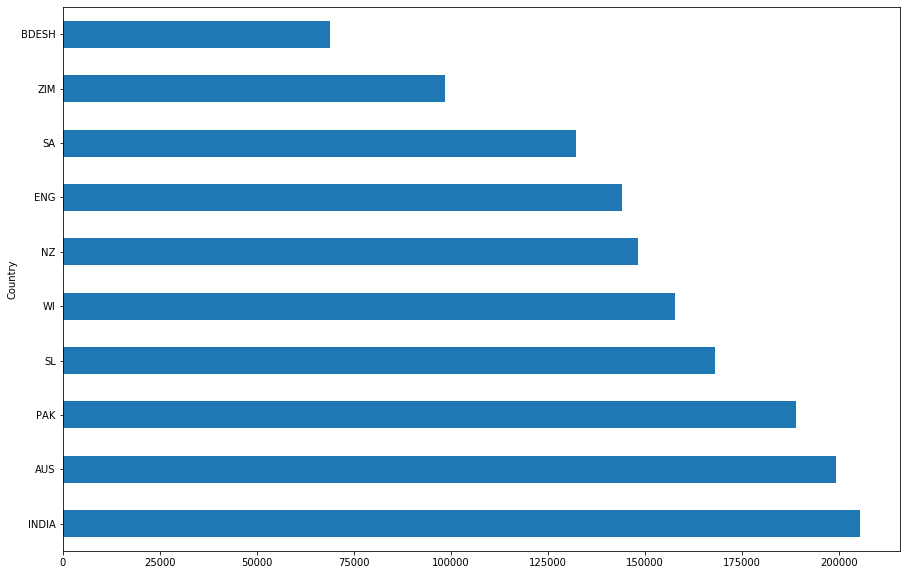

In [331]:
plt.figure(figsize=(15,10))
pure_df.groupby(['Country'])['Runs'].sum().sort_values(ascending=False).iloc[:10].plot(kind='barh')